In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.float_format', lambda x: '%.2f' % x)

Analisis descriptivo

In [7]:
categorical = [
    "Car", "Car_desc", "Jur", "Jur_desc", "Sjur", "Sjur_desc", "Ent", "Ent_desc", "Og", "Og_desc", "UE", "UE_desc", "Prog", "Prog_desc", "Sprog", "Sprog_desc", "Proy", "Proy_desc", "Actividad", "Act_desc", "Ob", "ob_desc", "Fin", "Fin_desc", "Fun", "Fun_desc", "Inc", "Inc_desc", "Ppal", "Ppal_desc", "Par", "Par_desc", "Spar", "Spar_desc", "Eco", "Eco_desc", "Fte", "Fte_desc", "Geo", "Geo_desc",
]

categoricalIds = list(
    filter(lambda text: not text.endswith("_desc"), categorical))
categoricalDesc = list(
    filter(lambda text: text.endswith("_desc"), categorical))

nonCategorical = [
    "Sanción", "Vigente", "Definitivo", "Devengado"
]

types = {var: "category" for var in categorical}

data = pd.read_csv("dataset.csv", dtype=types)

In [8]:
data[categoricalIds].describe()

,Car,Jur,Sjur,Ent,Og,UE,Prog,Sprog,Proy,Actividad,Ob,Fin,Fun,Inc,Ppal,Par,Spar,Eco,Fte,Geo
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801
unique,2,22,8,32,59,345,108,44,46,211,50,5,9,7,9,9,129,27,7,16
top,1,55,0,0,55,561,1,0,0,1000,0,3,2,1,1,1,0,21200000,11,1
freq,40450,7636,42638,40886,7636,3825,2655,43864,46609,10932,46722,23214,10891,16859,10524,12451,47451,16859,42906,18187


In [9]:
pd.crosstab(data["Jur"], data["Sjur"])

Sjur,0,21,22,24,26,27,29,35
Jur,,,,,,,,
1,75,0,0,0,0,0,0,0
2,63,0,0,0,0,0,0,0
20,437,1348,935,441,0,813,450,0
21,4727,0,0,0,0,0,0,0
26,2622,0,0,0,1880,0,0,0
28,1363,0,0,0,0,0,0,0
3,194,0,0,0,0,0,0,0
30,2906,0,0,0,0,0,0,0
35,4861,0,0,0,0,0,0,296


In [10]:
data[nonCategorical].describe()

,Sanción,Vigente,Definitivo,Devengado
count,48801.00,48801.00,48801.00,48801.00
mean,4565606.60,4660883.41,2406347.50,2081568.95
std,43003433.61,54857115.92,46065419.98,45597285.78
min,0.00,0.00,0.00,0.00
25%,0.00,7600.00,0.00,0.00
50%,41000.00,84816.00,9170.00,6179.34
75%,550000.00,845000.00,273456.40,222314.36
max,4008702080.00,7952610958.00,7952610957.70,7952610957.70


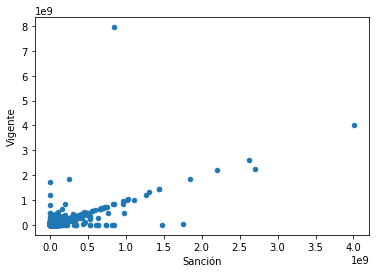

In [11]:
plt.show(data[nonCategorical].plot.scatter("Sanción", "Vigente"))

In [12]:
data[nonCategorical].corr()

,Sanción,Vigente,Definitivo,Devengado
Sanción,1.00,0.71,0.50,0.49
Vigente,0.71,1.00,0.91,0.91
Definitivo,0.50,0.91,1.00,1.00
Devengado,0.49,0.91,1.00,1.00


In [14]:
data[categoricalDesc].describe().loc[["unique", "count"]]

,Car_desc,Jur_desc,Sjur_desc,Ent_desc,Og_desc,UE_desc,Prog_desc,Sprog_desc,Proy_desc,Act_desc,ob_desc,Fin_desc,Fun_desc,Inc_desc,Ppal_desc,Par_desc,Spar_desc,Eco_desc,Fte_desc,Geo_desc
unique,2,22,29,59,59,343,510,553,791,1652,2111,5,20,7,48,171,352,22,7,16
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801


Tabla de frecuencias. 

In [15]:
for category_name in categoricalDesc:
    print(pd.value_counts(data[category_name]))
    data[category_name].count()
    print('-------------------------------------------------------------------------------------')

Administracion Central         40450
Organismos Descentralizados     8351
Name: Car_desc, dtype: int64
-------------------------------------------------------------------------------------
Ministerio De Educacion                             7636
Ministerio De Salud                                 6015
Ministerio De Ambiente Y Espacio Publico            5157
Jefatura De Gabinete De Ministros                   4727
Ministerio De Justicia Y Seguridad                  4502
Jefatura De Gobierno                                4424
Ministerio De Desarrollo Urbano Y Transporte        2906
Ministerio De Hacienda                              2793
Min.Hàbitat Y Des. Humano                           2726
Ministerio De Cultura                               2370
Min.Modern.Innovacion Y Tecnologia                  1791
Ministerio De Gobierno                              1363
Ministerio Publico                                   644
Procuracion General  De La Ciudad                    373
Consejo De La

Porcentaje datos faltantes

In [3]:
#for category_name in categorical:
for category_name in categoricalIds:
    print(data.loc[data[category_name].isnull(), category_name].count())
#print(data.loc[data['Definitivo'] == 0, 'Definitivo'].count())
print('-----------------')
for category_name in nonCategorical:
    print(data.loc[data[category_name]==0, category_name].count())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-----------------
12790
4081
17943
19105
